# #Importing Library

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Load the dataset

In [2]:

file_path = '/kaggle/input/bbc-full-text-document-classification/bbc_data.csv'
data = pd.read_csv(file_path)

# 1. Data Exploration

In [3]:


print("Data Sample:")
print(data.head())


Data Sample:
                                                data         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


In [4]:
data.describe()

,data,labels
count,2225,2225
unique,2126,5
top,Web radio takes Spanish rap global Spin the r...,sport
freq,2,511


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


# checking null value

In [6]:
data.isna().sum()

data      0
labels    0
dtype: int64

# Distribution of labels

In [7]:

label_counts = data['labels'].value_counts()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


# Plot label distribution

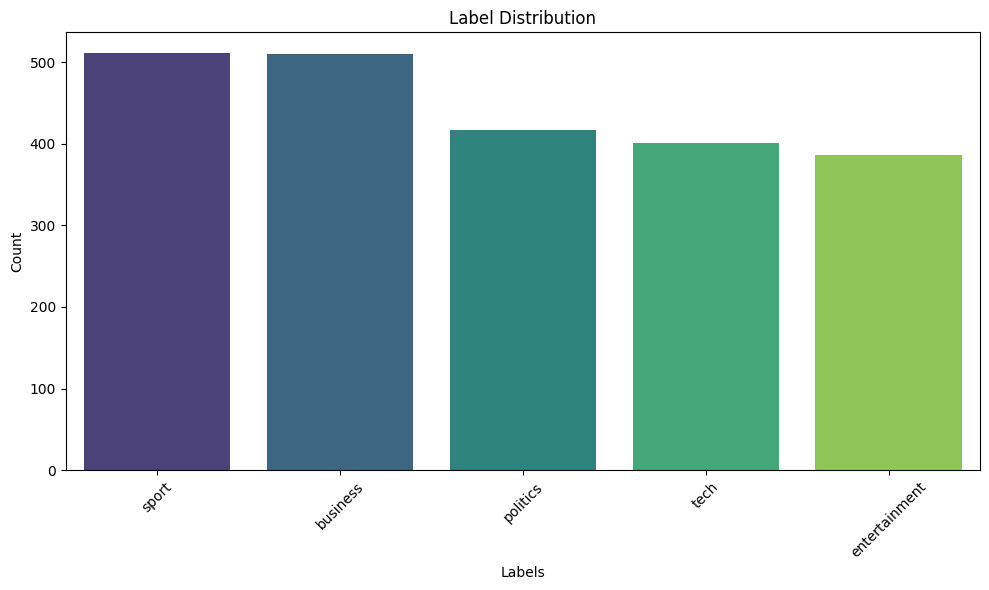

In [8]:

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Data Preparation

In [9]:

X = data['data']
y = data['labels']

# Split data into training and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transform text data using TfidfVectorizer

In [11]:

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# 3. Model Training

In [12]:

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=42)

# 4. Model Evaluation

In [13]:

predictions = model.predict(X_test_tfidf)

# Classification report

In [14]:

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       163
entertainment       0.97      0.96      0.97       120
     politics       0.95      0.99      0.97       112
        sport       1.00      0.99      1.00       148
         tech       1.00      0.96      0.98       125

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



# Confusion Matrix

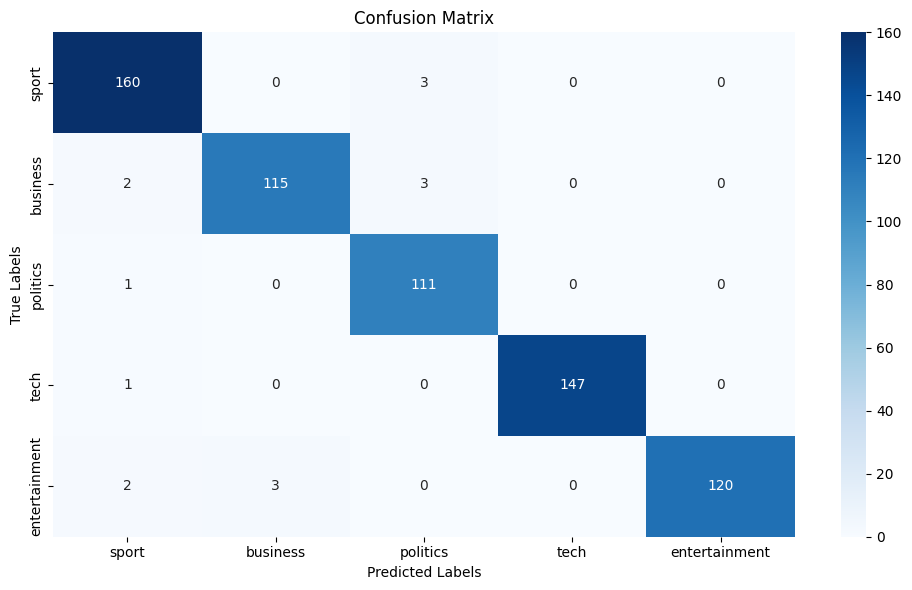

In [15]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_counts.index, yticklabels=label_counts.index)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Accuracy

In [16]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
